In [ ]:
# -----------------------------------------------------------------------------------
# 파일명       : Graph.ipynb
# 설명         : 시계열 데이터 패턴 시각화
# 작성자       : 이민하
# 작성일       : 2024-11-12
# 
# 사용 모듈    :
# - pandas       # 데이터프레임 기반 데이터 처리
# -----------------------------------------------------------------------------------
# >> 주요 기능
# - Sliding Window 알고리즘으로 데이터 패턴화
# - 모델별로 최적의 데이터 형태로 변형
#
# >> 업데이트 내역
# [2024-11-12] 일주일 단위의 Window로 패턴화
# [2024-11-13] 2주일 단위의 Window로 패턴화
# [2024-11-28] 일주일 + 1/4일 단위의 Window로 패턴화 (이상 데이터 제거)
# [2024-12-05] 일주일 단위의 Window로 데이터 변화량 패턴화 (이상 데이터 제거)
# [2024-12-08] 일주일 단위의 Window로 패턴화 (이상 데이터 제거)
# -----------------------------------------------------------------------------------


In [ ]:
# Import the Modules
import pandas as pd
import matplotlib.pyplot as plt
import os
import openpyxl

In [ ]:
# Set a Data Path and Read a Excel File
DATA_PATH = r'C:\Users\KDP-2\OneDrive\바탕 화면\Python\기업 프로젝트\Data\수도전기사용량_3개월분_수정본.xlsx'

data1 = pd.read_excel(DATA_PATH, header = 1)
data2 = pd.read_excel(DATA_PATH, header = 1, sheet_name = '수도사용량_3개월분')
data2

Unnamed: 0  2023-06-01 00:00:00  2023-06-01 00:00:00.1  \
0            세대                    1                      2   
1            1호                   30                    120   
2            2호                   58                    218   
3            3호                   28                    184   
4            4호                   14                    169   
...         ...                  ...                    ...   
996        996호                  188                     95   
997        997호                  188                     95   
998        998호                  218                    350   
999        999호                   43                    136   
1000      1000호                   10                     68   

      2023-06-01 00:00:00.2  2023-06-01 00:00:00.3  2023-06-02 00:00:00  \
0                         3                      4                    1   
1                       210                    410                   32   
2                       290                    105                   10   
3                       150                     38                   62   
4                        89                     55                   55   
...                     ...                    ...                  ...   
996                      46                    139                  214   
997                      46                    139                  214   
998                      38                    183                  190   
999                     189                     84                   54   
1000                     38                    263                   78   

      2023-06-02 00:00:00.1  2023-06-02 00:00:00.2  2023-06-02 00:00:00.3  \
0                         2                      3                      4   
1                       184                    180                    260   
2                        68                     38                    263   
3                       151                    140                    145   
4                       130                    135                    138   
...                     ...                    ...                    ...   
996                     247                     53                    160   
997                     247                     53                    160   
998                     230                     98                    143   
999                     141                    188                     95   
1000                    158                    290                    300   

      2023-06-03 00:00:00  ...  Unnamed: 598  Unnamed: 599  Unnamed: 600  \
0                       1  ...           NaN           NaN           NaN   
1                      35  ...           NaN           NaN           NaN   
2                      78  ...           NaN           NaN           NaN   
3                      78  ...           NaN           NaN           NaN   
4                      28  ...           NaN           NaN           NaN   
...                   ...  ...           ...           ...           ...   
996                   210  ...           NaN           NaN           NaN   
997                   210  ...           NaN           NaN           NaN   
998                   253  ...           NaN           NaN           NaN   
999                    46  ...           NaN           NaN           NaN   
1000                  280  ...           NaN           NaN           NaN   

      Unnamed: 601  Unnamed: 602  Unnamed: 603  Unnamed: 604  Unnamed: 605  \
0              NaN           NaN           NaN           NaN           NaN   
1              NaN           NaN           NaN           NaN           NaN   
2              NaN           NaN           NaN           NaN           NaN   
3              NaN           NaN           NaN           NaN           NaN   
4              NaN           NaN           NaN           NaN           NaN   
...            ...           ...         

In [ ]:
# Drop Unnecessary Rows and Columns
data1.drop(1001, axis = 0, inplace = True)

data1.dropna(axis = 1, inplace = True)
data2.dropna(axis = 1, inplace = True)

data1

Unnamed: 0  2023-06-01 00:00:00  2023-06-01 00:00:00.1  \
0            세대                 1.00                   2.00   
1            1호                 1.23                   1.45   
2            2호                 1.35                   1.35   
3            3호                 1.36                   1.44   
4            4호                 1.23                   1.44   
...         ...                  ...                    ...   
996        996호                 1.45                   1.73   
997        997호                 1.29                   1.69   
998        998호                 1.44                   1.64   
999        999호                 1.23                   1.45   
1000      1000호                 1.45                   1.64   

      2023-06-01 00:00:00.2  2023-06-01 00:00:00.3  2023-06-02 00:00:00  \
0                      3.00                   4.00                 1.00   
1                      1.73                   1.62                 1.31   
2                      1.35                   1.34                 1.36   
3                      1.42                   1.36                 1.36   
4                      1.73                   1.61                 1.33   
...                     ...                    ...                  ...   
996                    1.62                   1.31                 1.48   
997                    1.57                   1.26                 1.36   
998                    1.55                   1.45                 1.56   
999                    1.73                   1.62                 1.31   
1000                   1.79                   1.34                 1.35   

      2023-06-02 00:00:00.1  2023-06-02 00:00:00.2  2023-06-02 00:00:00.3  \
0                      2.00                   3.00                   4.00   
1                      1.48                   1.74                   1.71   
2                      1.42                   1.41                   1.38   
3                      1.42                   1.43                   1.39   
4                      1.47                   1.73                   1.71   
...                     ...                    ...                    ...   
996                    1.74                   1.71                   1.30   
997                    1.64                   1.59                   1.48   
998                    1.45                   1.71                   1.63   
999                    1.48                   1.74                   1.71   
1000                   1.46                   1.49                   1.33   

      2023-06-03 00:00:00  ...  2023-08-29 00:00:00.2  2023-08-29 00:00:00.3  \
0                    1.00  ...                   3.00                   4.00   
1                    1.30  ...                   1.66                   1.64   
2                    1.36  ...                   1.59                   1.48   
3                    1.32  ...                   1.64                   1.79   
4                    1.32  ...                   1.73                   1.71   
...                   ...  ...                    ...                    ...   
996                  1.49  ...                   1.68                   1.36   
997                  1.72  ...                   1.46                   1.36   
998                  1.34  ...                   1.79                   1.35   
999                  1.32  ...                   1.49                   1.25   
1000                 1.44  ...                   1.66                   1.35   

      2023-08-30 00:00:00  2023-08-30 00:00:00.1  2023-08-30 00:00:00.2  \
0                    1.00                   2.00                   3.00   
1                    1.27                   1.29                   1.69   
2                    1.41                   1.47                   1.54   
3                    1.34                   1.35                   1.46   
4                    1.32                   1.49                   1.94   
...        

In [7]:
data1.drop(data1.columns[0], axis = 1, inplace = True)
data2.drop(data2.columns[0], axis = 1, inplace = True)
data1

2023-06-01 00:00:00  2023-06-01 00:00:00.1  2023-06-01 00:00:00.2  \
0                    1.00                   2.00                   3.00   
1                    1.23                   1.45                   1.73   
2                    1.35                   1.35                   1.35   
3                    1.36                   1.44                   1.42   
4                    1.23                   1.44                   1.73   
...                   ...                    ...                    ...   
996                  1.45                   1.73                   1.62   
997                  1.29                   1.69                   1.57   
998                  1.44                   1.64                   1.55   
999                  1.23                   1.45                   1.73   
1000                 1.45                   1.64                   1.79   

      2023-06-01 00:00:00.3  2023-06-02 00:00:00  2023-06-02 00:00:00.1  \
0                      4.00                 1.00                   2.00   
1                      1.62                 1.31                   1.48   
2                      1.34                 1.36                   1.42   
3                      1.36                 1.36                   1.42   
4                      1.61                 1.33                   1.47   
...                     ...                  ...                    ...   
996                    1.31                 1.48                   1.74   
997                    1.26                 1.36                   1.64   
998                    1.45                 1.56                   1.45   
999                    1.62                 1.31                   1.48   
1000                   1.34                 1.35                   1.46   

      2023-06-02 00:00:00.2  2023-06-02 00:00:00.3  2023-06-03 00:00:00  \
0                      3.00                   4.00                 1.00   
1                      1.74                   1.71                 1.30   
2                      1.41                   1.38                 1.36   
3                      1.43                   1.39                 1.32   
4                      1.73                   1.71                 1.32   
...                     ...                    ...                  ...   
996                    1.71                   1.30                 1.49   
997                    1.59                   1.48                 1.72   
998                    1.71                   1.63                 1.34   
999                    1.74                   1.71                 1.32   
1000                   1.49                   1.33                 1.44   

      2023-06-03 00:00:00.1  ...  2023-08-29 00:00:00.2  \
0                      2.00  ...                   3.00   
1                      1.49  ...                   1.66   
2                      1.42  ...                   1.59   
3                      1.41  ...                   1.64   
4                      1.49  ...                   1.73   
...                     ...  ...                    ...   
996                    1.94  ...                   1.68   
997                    1.63  ...                   1.46   
998                    1.31  ...                   1.79   
999                    1.49  ...                   1.49   
1000                   1.45  ...                   1.66   

      2023-08-29 00:00:00.3  2023-08-30 00:00:00  2023-08-30 00:00:00.1  \
0                      4.00                 1.00                   2.00   
1                      1.64                 1.27                   1.29   
2                      1.48                 1.41                   1.47   
3                      1.79                 1.34                   1.35   
4                      1.71                 1.32                   1.49   
...                     ...                  ...                    ...   
996                    1.36                 1.43                   1.

In [ ]:
# Change the Columns' names by Six Hours
column_name = pd.date_range('2023-06-01', '2023-09-01', freq = '6H')
column_name = column_name[:-1]

In [9]:
data1.columns = column_name
data2.columns = column_name

data1

2023-06-01 00:00:00  2023-06-01 06:00:00  2023-06-01 12:00:00  \
0                    1.00                 2.00                 3.00   
1                    1.23                 1.45                 1.73   
2                    1.35                 1.35                 1.35   
3                    1.36                 1.44                 1.42   
4                    1.23                 1.44                 1.73   
...                   ...                  ...                  ...   
996                  1.45                 1.73                 1.62   
997                  1.29                 1.69                 1.57   
998                  1.44                 1.64                 1.55   
999                  1.23                 1.45                 1.73   
1000                 1.45                 1.64                 1.79   

      2023-06-01 18:00:00  2023-06-02 00:00:00  2023-06-02 06:00:00  \
0                    4.00                 1.00                 2.00   
1                    1.62                 1.31                 1.48   
2                    1.34                 1.36                 1.42   
3                    1.36                 1.36                 1.42   
4                    1.61                 1.33                 1.47   
...                   ...                  ...                  ...   
996                  1.31                 1.48                 1.74   
997                  1.26                 1.36                 1.64   
998                  1.45                 1.56                 1.45   
999                  1.62                 1.31                 1.48   
1000                 1.34                 1.35                 1.46   

      2023-06-02 12:00:00  2023-06-02 18:00:00  2023-06-03 00:00:00  \
0                    3.00                 4.00                 1.00   
1                    1.74                 1.71                 1.30   
2                    1.41                 1.38                 1.36   
3                    1.43                 1.39                 1.32   
4                    1.73                 1.71                 1.32   
...                   ...                  ...                  ...   
996                  1.71                 1.30                 1.49   
997                  1.59                 1.48                 1.72   
998                  1.71                 1.63                 1.34   
999                  1.74                 1.71                 1.32   
1000                 1.49                 1.33                 1.44   

      2023-06-03 06:00:00  ...  2023-08-29 12:00:00  2023-08-29 18:00:00  \
0                    2.00  ...                 3.00                 4.00   
1                    1.49  ...                 1.66                 1.64   
2                    1.42  ...                 1.59                 1.48   
3                    1.41  ...                 1.64                 1.79   
4                    1.49  ...                 1.73                 1.71   
...                   ...  ...                  ...                  ...   
996                  1.94  ...                 1.68                 1.36   
997                  1.63  ...                 1.46                 1.36   
998                  1.31  ...                 1.79                 1.35   
999                  1.49  ...                 1.49                 1.25   
1000                 1.45  ...                 1.66                 1.35   

      2023-08-30 00:00:00  2023-08-30 06:00:00  2023-08-30 12:00:00  \
0                    1.00                 2.00                 3.00   
1                    1.27                 1.29                 1.69   
2                    1.41                 1.47                 1.54   
3                    1.34                 1.35                 1.46   
4                    1.32                 1.49                 1.94   
...                   ...                  ...                  ...   
996                  1.43            

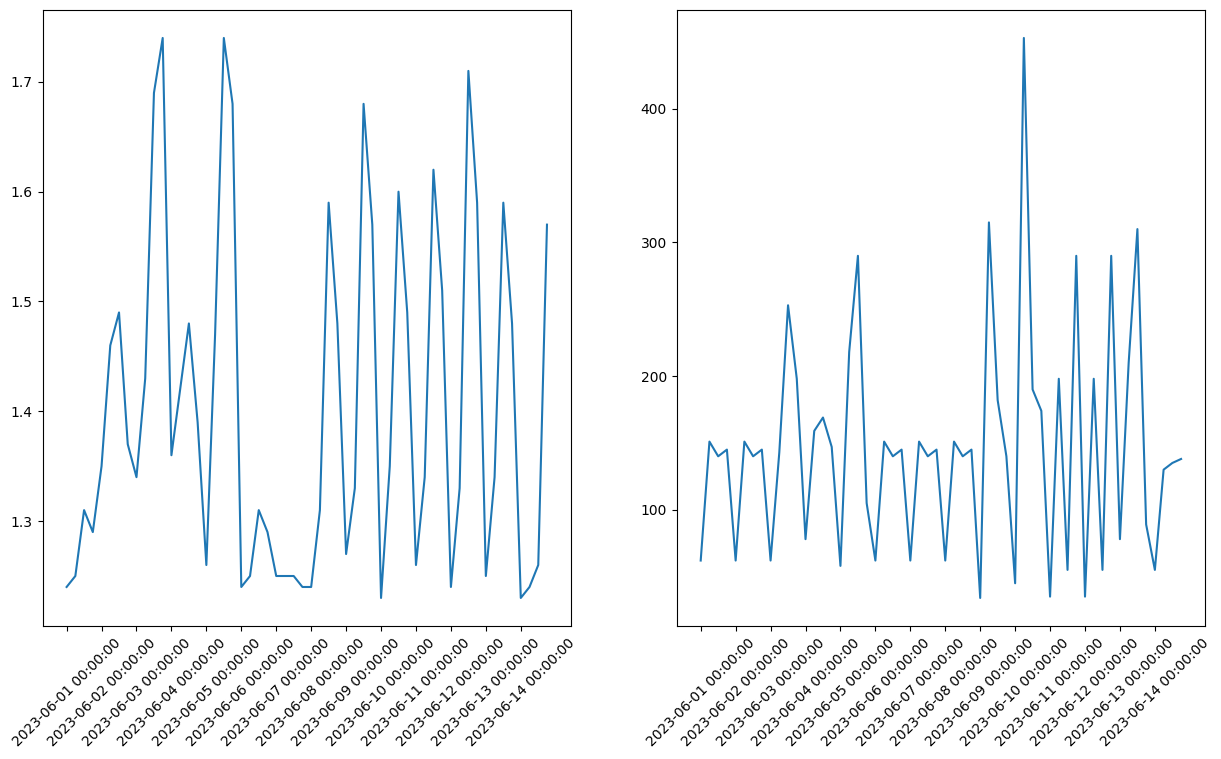

In [ ]:
# Draw the Graphs by Checking their Shape
fig = plt.figure(figsize = (15, 8))

axes = fig.subplots(1, 2)

# Draw a Electric Graph by Two Weeks
axes[0].plot(data1.columns[:56], data1.iloc[123].values[:56])
axes[0].set_xticks(data1.columns[:56:4])
axes[0].set_xticklabels(labels = data1.columns[:56:4], rotation = 45)

# Draw a Water Graph by Two Weeks
axes[1].plot(data2.columns[:56], data2.iloc[123].values[:56])
axes[1].set_xticks(data2.columns[:56:4])
axes[1].set_xticklabels(labels = data2.columns[:56:4], rotation = 45)

plt.show()

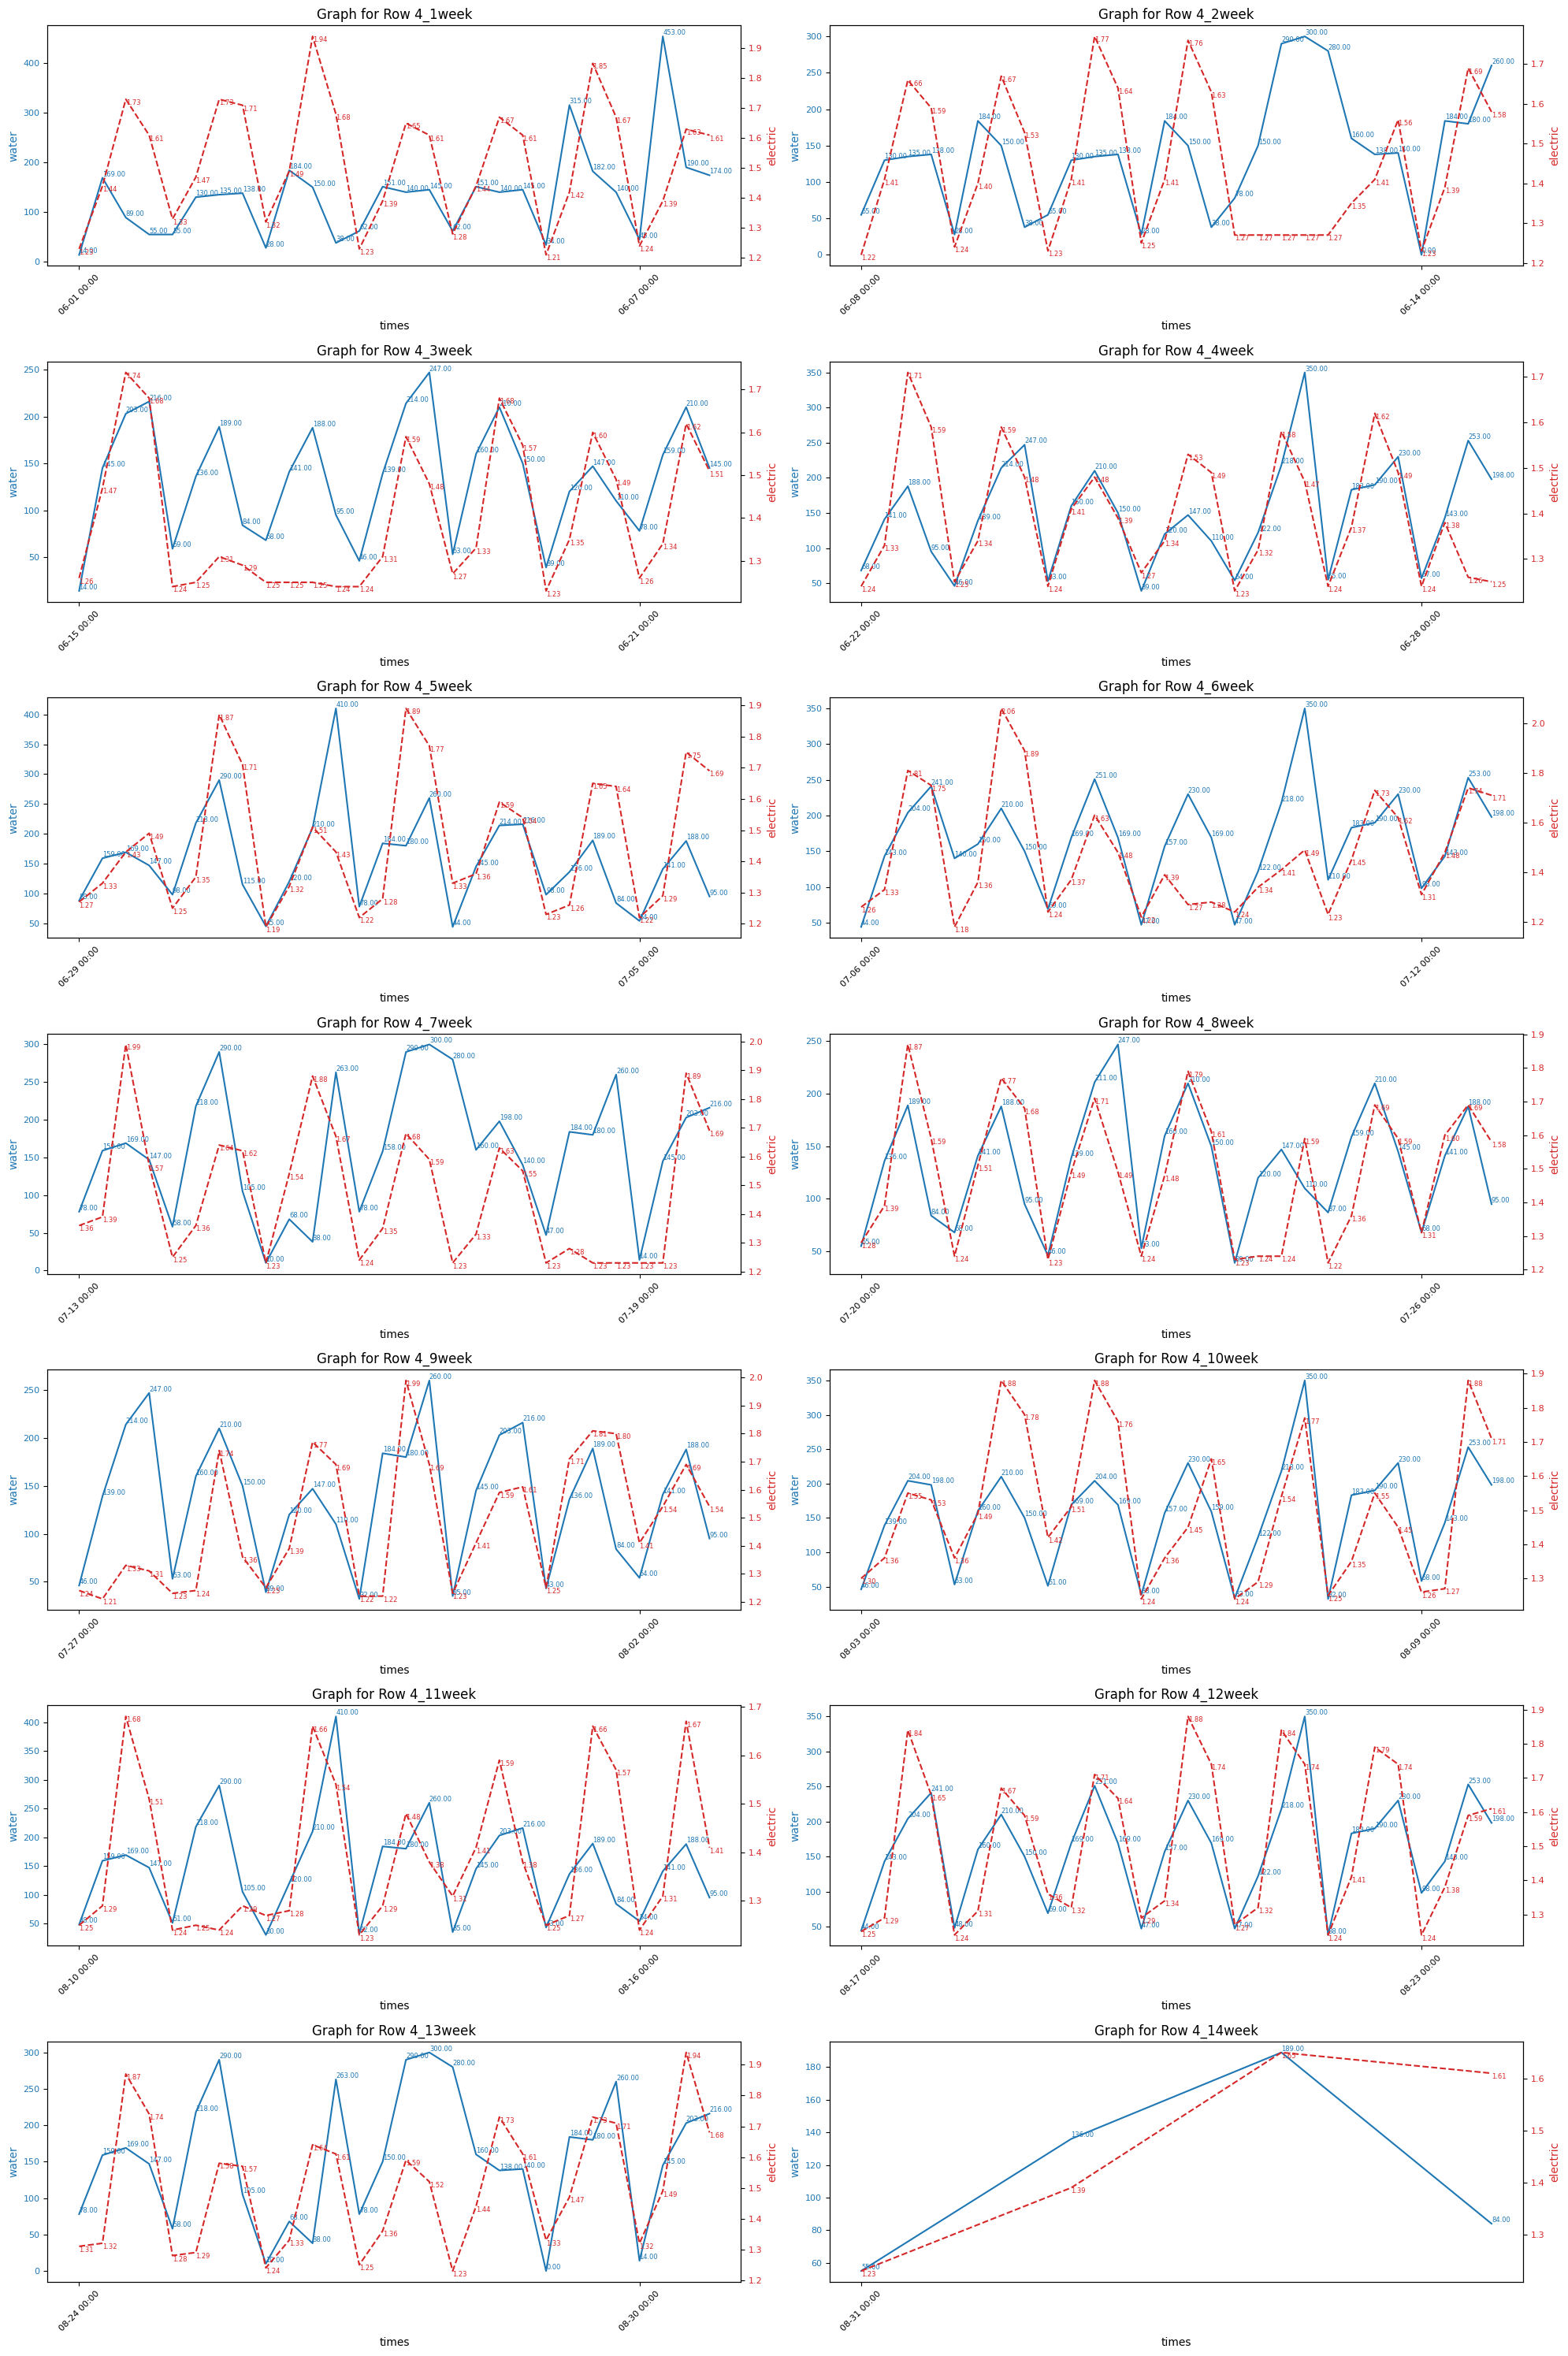

In [ ]:
# Overview the Electric and Water Data
point = 4  # Set a HO(호)
end = 13
days = 7 * 4
time_list = pd.date_range('2023-06-01', '2023-09-01', freq='6H')
time_list = time_list.delete(-1)  # Delete a Last Element to Equal Shapes

fig, axes = plt.subplots(7, 2, figsize=(20, 30))  
axes = axes.flatten() # Transform 2D Axes to 1D Axes to Easy to Use Indexe

for i in range(end + 1):
    y = data2.iloc[point][i * days:((i + 1) * days)].values
    z = data1.iloc[point][i * days:((i + 1) * days)].values
    
    # Make a Time List
    t = time_list[i * days:((i + 1) * days)]
    
    ax1 = axes[i]
    
    # Left Y Axis - Water Data
    color = 'tab:blue'
    ax1.set_xlabel('times', fontsize=10)
    ax1.set_ylabel('water', color=color, fontsize=10)
    ax1.plot(t, y, color=color)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=8)
    ax1.tick_params(axis='x', labelsize=8)
    ax1.set_xticks(t[::24])
    ax1.set_xticklabels(t[::24].strftime('%m-%d %H:%M'), rotation=45)

    # View Amounts above Each Data Points
    for j, value in enumerate(y):
        ax1.text(t[j], y[j], f'{value:.2f}', va='bottom', color=color, fontsize=6)

    # Right Y Axis - Electric Data
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('electric', color=color, fontsize=10)
    ax2.plot(t, z, color=color, linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=8)
    
    # View Amounts above Each Data Points
    for j, value in enumerate(z):
        ax2.text(t[j], z[j], f'{value:.2f}', va='top', color=color, fontsize=6)

    # Add Titles above Each Subplots
    ax1.set_title(f'Graph for Row {point}_{i + 1}week', fontsize=12)

plt.tight_layout()
plt.show()